<a href="https://colab.research.google.com/github/YousefAbua/Intro-To-ML/blob/main/Homework2/PreProcessing_Q3A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HW2_Question3 (Preprocessing: Normalization with MIN/MAX & Parameter Penalty)

In [128]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from IPython.display import display
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [129]:
# Import and read file
file_path = '/content/drive/My Drive/Intro to ML/Datasets/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))
housing_STD = housing

# Checking Null values
housing.isnull().sum()*100/housing.shape[0]

# Paramters that are strings
varlist = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']

# Parameters for part Q1_a and Q1_b
varlist1 = ['area','bedrooms','bathrooms','stories','parking']
varlist2 = ['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']

# Binary map to convery strings to numerical values in chart
def binary_map(x):
  return x.map({'yes' : 1, 'no' : 0})

# Applying binary map
housing[varlist] = housing[varlist].apply(binary_map)

scaler = preprocessing.MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
# Preprocessing the output resulted in a better gradient descent
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

housing[num_vars] = scaler.fit_transform(housing[num_vars])
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,0.6,0.333333,0.666667,1,0,0,0,1,0.666667,1,furnished
1,0.909091,0.502405,0.6,1.000000,1.000000,1,0,0,0,1,1.000000,0,furnished
2,0.909091,0.571134,0.4,0.333333,0.333333,1,0,1,0,0,0.666667,1,semi-furnished
3,0.906061,0.402062,0.6,0.333333,0.333333,1,0,1,0,1,1.000000,1,furnished
4,0.836364,0.396564,0.6,0.000000,0.333333,1,1,1,0,1,0.666667,0,furnished


In [130]:
# Randomize split for train and validation set
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

y_train = df_train.pop('price')
y_test = df_test.pop('price')

# Initlize Theta
theta1 = np.zeros(6)
theta2 = np.zeros(12)

Y = y_train.values
V_Y = y_test.values

train_size = len(df_train)
valid_size = len(df_test)

X_A = np.c_[np.ones((train_size, 1)), df_train[varlist1]]
VX_A = np.c_[np.ones((valid_size, 1)), df_test[varlist1]]

X_B = np.c_[np.ones((train_size, 1)), df_train[varlist2]]
VX_B = np.c_[np.ones((valid_size, 1)), df_test[varlist2]]

In [131]:
def grad_desc(X, Y, size, theta, alpha, iteration, VX, VY, Vsize):
  train_losses = []
  val_losses = []
  for i in range(iteration):
    gradients = 2/size * X.T.dot(X.dot(theta) - Y)
    theta = (theta*(1-alpha/size)) - (alpha * gradients)

    train_loss = (1/size) * (np.sum(np.square(X.dot(theta) - Y)) + lam * np.sum(np.square(theta[1:])))
    val_loss = (1/Vsize) * np.sum(np.square(X.dot(theta) - Y))

    train_losses.append(train_loss)
    val_losses.append(val_loss)
  return theta, train_losses, val_losses


In [132]:
alpha = 0.01
lam = 0.0001
iteration = 1000

theta1, cost_history1, accuracy1 = grad_desc(X_A, Y, train_size, theta1, alpha, iteration, VX_A, V_Y, valid_size)
theta2, cost_history2, accuracy2 = grad_desc(X_B, Y, train_size, theta2, alpha, iteration, VX_B, V_Y, valid_size)

print(theta1)

[0.1028501  0.17603189 0.0906234  0.16453703 0.14470183 0.1232325 ]


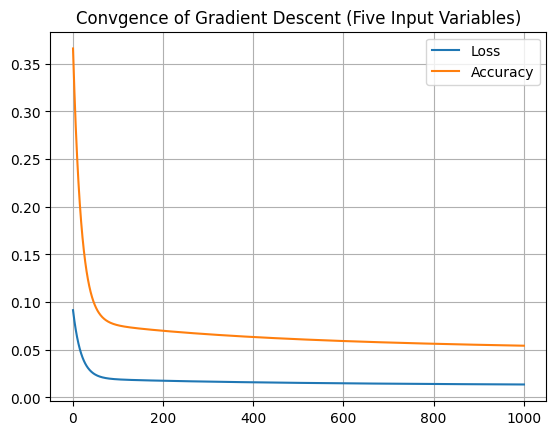

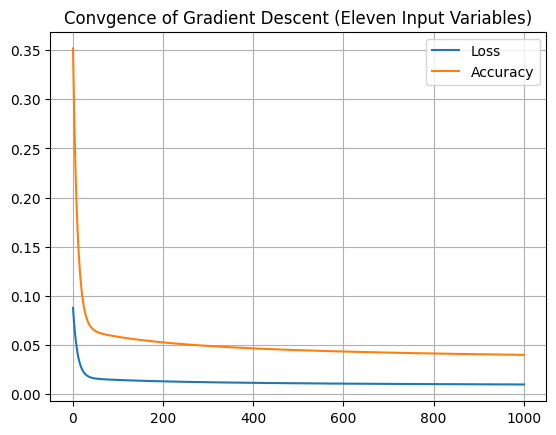

In [133]:
plt.plot(range(1, iteration+1), cost_history1, label = 'Loss');
plt.plot(range(1, iteration+1), accuracy1, label = 'Accuracy');
plt.grid(True)
plt.title("Convgence of Gradient Descent (Five Input Variables)")
plt.legend()
plt.show()

plt.plot(range(1, iteration+1), cost_history2, label = 'Loss');
plt.plot(range(1, iteration+1), accuracy2, label = 'Accuracy');
plt.grid(True)
plt.title("Convgence of Gradient Descent (Eleven Input Variables)")
plt.legend()
plt.show()